# Course 5: Home Loan Data Analysis

## Problem Statement
For a safe and secure lending experience, it's important to analyze past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

## Prepare the environment

In [ ]:
# install libraries for docker environments
!pip install pandas seaborn matplotlib

In [1]:
# Generic Data handling libraries
import pandas as pd
import numpy as np

# import visualisers
import matplotlib.pyplot as plt 
import seaborn as sb

# Make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

# mute hardware optimization messages if using tensorflow docker containers
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

# tensorflow libraries
import tensorflow as tf
from tensorflow.keras import layers

## Prepare and cleanse the Data

### Load the dataset that is given to you

In [2]:
# read from csv
loan_raw = pd.read_csv("loan_data_raw.csv")

# check data
loan_raw.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# check quick distribution of dataset
loan_raw.shape

(307511, 122)

In [4]:
# review general dataset stats
loan_raw.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Check for null values in the dataset

In [5]:
# Check for nulls
nulls = loan_raw.isna().sum(axis=0)
print(nulls.to_string())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Drop Rows with null values

In [6]:
# remove unnecessary columns, i.e. personal identifiers, statistical values
# remove rows with missing values 
loans = loan_raw.dropna().drop("SK_ID_CURR", axis=1)
loans.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,238500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,774000.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [7]:
loans.shape

(8602, 121)

### Encode Categorical Columns

In [8]:
# check types of columns
print(loans.dtypes.to_string())

TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [9]:
# Convert all string columns to categorical columns
cat_columns = loans.select_dtypes(['object']).columns
loans[cat_columns] = loans[cat_columns].astype("category")

In [10]:
# Encode all categorical columns
loans[cat_columns] = loans[cat_columns].apply(lambda x: x.cat.codes)
loans.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,0,0,1,0,1,0,103500.0,573628.5,24435.0,463500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,0,0,0,0,1,1,202500.0,260725.5,16789.5,198000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,0,0,0,0,0,0,202500.0,675000.0,53329.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,0,0,1,0,0,0,162000.0,263686.5,24781.5,238500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,1,0,1,0,0,1,225000.0,1019205.0,31032.0,774000.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


### Visualize the percentage of default to a payer of the dataset for the **TARGET** column

In [11]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

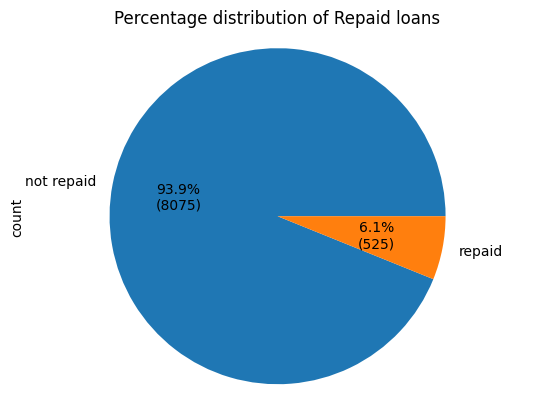

In [12]:
# Preprocess target data
target = loans["TARGET"].replace("", np.nan).value_counts(dropna=False)
target.plot.pie(
    autopct=lambda pct: func(pct, target), 
    labels=['not repaid', 'repaid', 'NaN']
)

plt.title('Percentage distribution of Repaid loans')

plt.axis('equal')
plt.show()

### Balance the dataset if the data is imbalanced

In [ ]:
# install smote if using docker
!pip install imblearn

In [13]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(loans,loans["TARGET"])
y.value_counts()

TARGET
0    8076
1    8076
Name: count, dtype: int64

### Visualize the rebalanced dataset

In [14]:
# drop the "TARGET" column from the input dataset
x = x.drop("TARGET", axis=1)

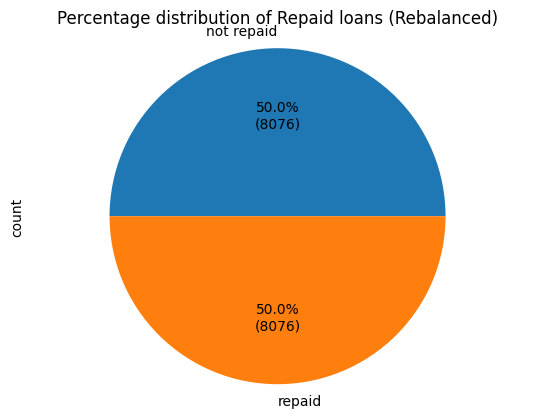

In [15]:
plot_y = y.value_counts(dropna=False)
plot_y.plot.pie(
    autopct=lambda pct: func(pct, plot_y), 
    labels=['not repaid', 'repaid', 'NaN']
)

plt.title('Percentage distribution of Repaid loans (Rebalanced)')

plt.axis('equal')
plt.show()

## Pre-Training Preparations

In [ ]:
# install scikit learn for docker
!pip install scikit-learn

In [16]:
### Train-test Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

# Verify Split
print(f"Shape of Train X(%s); y(%s)" % (X_train.shape, y_train.shape))
print(f"Shape of Test X(%s); y(%s)" % (X_test.shape, y_test.shape))

Shape of Train X((10821, 120)); y((10821,))
Shape of Test X((5331, 120)); y((5331,))


In [17]:
# Import scaler for normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
# Scale Train dataset
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
# Scale Test Dataset
X_test_scaled = scaler.transform(X_test)

## Train and Test Model

### Define Model

In [ ]:
# when using tensorflow in docker
!pip install keras_tuner

In [20]:
# import tuner libraries
import keras_tuner
from keras_tuner import HyperModel
from keras_tuner import RandomSearch

class TrainModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = tf.keras.Sequential([
            layers.Dense(
                units=hp.Int("units", min_value=12, max_value=120, step=12), 
                activation='relu', 
                input_shape=(self.input_shape,)
            ),
            layers.Dropout(
                hp.Float('dropout', min_value=0.0, max_value=0.6, step=0.1)
            ),
            layers.Dense(
                units=hp.Int('units', min_value=5, max_value=60, step=5), 
                activation='relu'
            ),
            layers.Dense(1, activation='sigmoid'),
        ])
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Float(
                    'learning_rate', 
                    min_value=1e-4, 
                    max_value=1e-2, 
                    sampling='LOG')
            ),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model
        

In [21]:
# Extract the number of features
input_shape = X_train.shape[1]

# Instantiate the HyperModel
hypermodel = TrainModel(input_shape=input_shape)

# Instantiate the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_data',
    project_name='loan_default_optimization'
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# perform the hyperparameter tuning
epochs = 20
validation_split = 0.2
tuner.search(
    X_train_scaled, 
    y_train, 
    epochs=epochs,
    validation_split=validation_split
)

Trial 10 Complete [00h 00m 35s]
val_accuracy: 0.939722865819931

Best val_accuracy So Far: 0.939722865819931
Total elapsed time: 00h 05m 47s


In [23]:
# Get the best model
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Evaluate the Results

In [24]:
# import require libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Generate the Predicted results

In [25]:
# evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9401 - loss: 0.2475   


In [26]:
# predict the values of y
y_pred = model.predict(X_test)

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [27]:
# Print classification report
print("Model Classification Report: ")
print(classification_report(
    y_test, 
    y_pred, 
    target_names=['not repaid', 'repaid'],
    zero_division=0.0
))

Model Classification Report: 
              precision    recall  f1-score   support

  not repaid       0.50      1.00      0.67      2670
      repaid       0.00      0.00      0.00      2661

    accuracy                           0.50      5331
   macro avg       0.25      0.50      0.33      5331
weighted avg       0.25      0.50      0.33      5331



### Generate the Confusion Matrix

<Axes: >

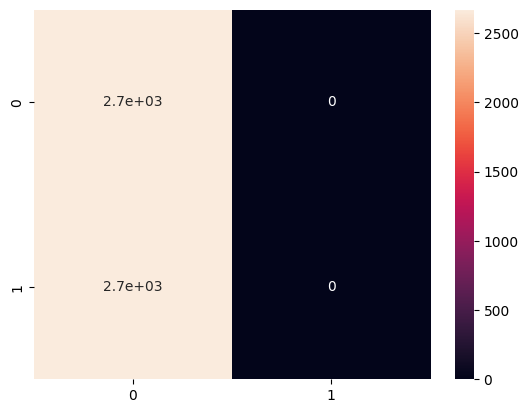

In [28]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True)

### Calculate the sensitivity of the model 

In [29]:
total = sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity: ", sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print("Specificity: ", specificity)

Sensitivity:  1.0
Specificity:  0.0


### Calculate the area under the receiver operating characteristics (ROC) curve

In [30]:
# Calculate and print the ROC
auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC: ", auc)

ROC_AUC:  0.5
